In [1]:
import torch
import fit.sine_pde_eps as T
import numpy as np

from IPython.display import HTML
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt

%matplotlib inline
torch.set_printoptions(precision=4, linewidth=500, sci_mode=True)

Using double precision solver
mi list ((0, 0), (1, 0), (0, 1), (2, 0), (0, 2))
Constraints Shape eq torch.Size([1024, 13184]), init torch.Size([124, 13184]), deriv torch.Size([8064, 13184])
Initial/boundary Constraints shape  torch.Size([1, 124, 13184])


/nfs/scistore19/locatgrp/apervez/work/mech-nn-dev/solver/lp_pde_central_diff.py:950: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.derivative_row_sorted = torch.tensor(row_sorted)
/nfs/scistore19/locatgrp/apervez/work/mech-nn-dev/solver/lp_pde_central_diff.py:951: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.derivative_column_sorted = torch.tensor(column_sorted)
/nfs/scistore19/locatgrp/apervez/work/mech-nn-dev/solver/lp_pde_central_diff.py:963: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.eq_row_sorted = torch.tensor(row

In [2]:
T.train()

/nfs/scistore19/locatgrp/apervez/miniforge3/envs/lppde/lib/python3.8/site-packages/lightning_fabric/plugins/environments/slurm.py:191: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /nfs/scistore19/locatgrp/apervez/miniforge3/envs/lpp ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/nfs/scistore19/locatgrp/apervez/miniforge3/envs/lppde/lib/python3.8/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:67: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Plea

Epoch 0:   0%|          | 0/1 [00:00<?, ?it/s] torch.Size([2, 120696]) torch.Size([120696])
do_csr
start perm
done computing perm
do_symlq
torch.Size([2, 120696]) torch.Size([120696])
building blocks
end blocks, shape  torch.Size([1, 22396, 22396])
starting
100 3.3473746060405 3.3473746060405 4125.365839068581
200 3.1546409940616322 3.1546409940616322 5834.133301731303
300 2.9789334233955405 2.9789334233955405 7145.309349731329
400 2.8508492222274247 2.8508492222274247 8250.686235685373
500 2.3035332963836765 2.3035332963836765 9224.541800448798
600 1.5829028465403696 1.5829028465403696 10104.97671219331
700 1.3585011502818143 1.3585011502818143 10914.614383692426
800 1.2977596236349709 1.2977596236349709 11668.210326120929
900 1.2658246491640062 1.2658246491640062 12375.987852306396
1000 1.2336825207939337 1.2336825207939337 13045.436789119427
1100 1.223990217389243 1.223990217389243 13682.16213535029
1200 1.2179451522538618 1.2179451522538618 14290.561297291415
1300 1.210980623512600

/nfs/scistore19/locatgrp/apervez/miniforge3/envs/lppde/lib/python3.8/site-packages/pytorch_lightning/trainer/call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...


In [3]:
end = T.method.model.end
coord_dims = T.method.model.coord_dims
#_t = np.linspace(0, end, coord_dims[0])
target = T.dataset.y
damp = T.dataset.damp

In [4]:
T.method.model.coeffs.shape

torch.Size([1, 1, 6])

In [10]:
damp

array([[0.53526143, 0.5565612 , 0.57720502, ..., 0.57720502, 0.5565612 ,
        0.53526143],
       [0.5565612 , 0.57870855, 0.60017386, ..., 0.60017386, 0.57870855,
        0.5565612 ],
       [0.57720502, 0.60017386, 0.62243535, ..., 0.62243535, 0.60017386,
        0.57720502],
       ...,
       [0.57720502, 0.60017386, 0.62243535, ..., 0.62243535, 0.60017386,
        0.57720502],
       [0.5565612 , 0.57870855, 0.60017386, ..., 0.60017386, 0.57870855,
        0.5565612 ],
       [0.53526143, 0.5565612 , 0.57720502, ..., 0.57720502, 0.5565612 ,
        0.53526143]])

In [4]:
target.shape

torch.Size([32, 32])

In [4]:
func_list = T.method.func_list
y_list = T.method.y_list
#n_iter =500

In [6]:
(func_list[0].shape)

(1, 1, 1024)

In [7]:
t = np.linspace(0, end, coord_dims[0])
x = np.linspace(0, 10, coord_dims[1])

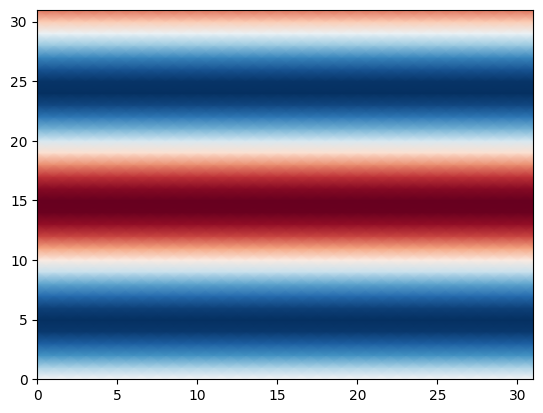

In [8]:
#plot = plt.pcolormesh(t, x, target, cmap='RdBu', shading='flat')
#plot = plt.pcolormesh(t, x, target, cmap='RdBu')
plot = plt.pcolormesh(target, cmap='RdBu', shading='gouraud')
#plot = plt.pcolormesh(damp, cmap='RdBu', shading='gouraud')
#plot = plt.pcolormesh(func_list[-1].reshape((32,32)), cmap='RdBu', shading='gouraud')

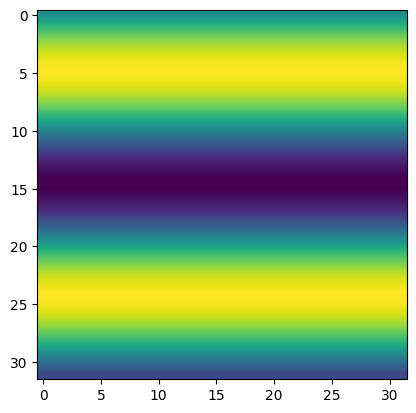

In [9]:
im = plt.imshow(target, interpolation='bilinear')

In [10]:
plt.show()

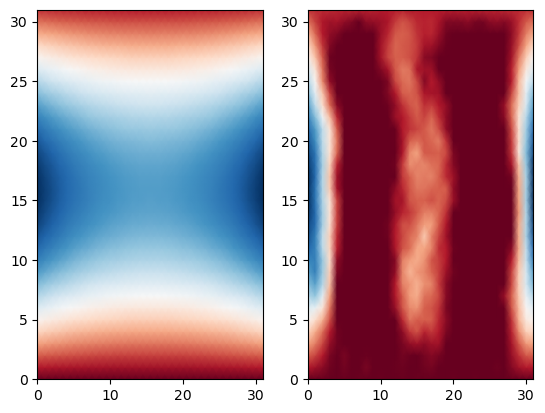

In [5]:
fig, ax = plt.subplots(1,2)
cax0 = ax[0].pcolormesh(y_list[-1].reshape(*coord_dims), cmap='RdBu', shading='gouraud')
cax1 = ax[1].pcolormesh(func_list[-1].reshape(*coord_dims), cmap='RdBu', shading='gouraud')

def animate(i):
   cax0.set_array(y_list[i].reshape(*coord_dims).flatten())
   cax1.set_array(func_list[i].reshape(*coord_dims).flatten())

anim = FuncAnimation(fig, animate, interval=100, frames=13)
HTML(anim.to_html5_video())

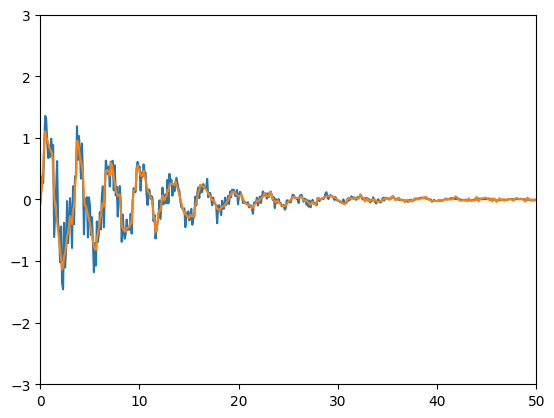

In [5]:

fig, ax = plt.subplots(1,1)
ax.set_xlim((0,end))
ax.set_ylim((-3,3))

line1, = ax.plot([], [])
line2, = ax.plot([], [])


def animate(t):
    line1.set_data(_y,y_list[2*t])
    line2.set_data(_y,func_list[2*t])
    return line1,
anim = FuncAnimation(fig, animate, frames=250, interval=20, blit=True)

HTML(anim.to_html5_video())